# **METRICS & MODEL EVALUATION**
1. TP : predik dan aktual 1
2. TN: predik dan aktual 0
3. FP : predik 1 aktual 0
4. FN: predik 0 aktual 1

**Confusion Matrix**<br>
True positif    | False negatif<br>
False positif   | True negatif<br>

fungsinya mencari akurasi itu untuk mengevaluasi akurasi model kita<br>

11 | 10<br>
01 | 00


### Apa itu F1-Score
60km, 30km, rata-rata nya 45km tapi ini salah<br>

 harmonic mean = nilai rata-rata yg ga static<br>

 30 x 2 = 60<br>
 60 x 1 = 60<br>
        = 120 : 3 = 30<br>
 3 dapat dari 2+1<br>



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [4]:
df['target'] = iris.target

In [5]:
x = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]
y = df['target']

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

### Coba Dengan KNN

In [7]:
df['target'] = iris.target
df['target_name'] = df['target'].apply(lambda x: iris.target_names[x])

for i, name in enumerate(iris.target_names):
    print(f'{i} = {name}')

0 = setosa
1 = versicolor
2 = virginica


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_Test_scaled = scaler.transform(X_test)

In [9]:

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_scaled, Y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [10]:
y_pred_knn = model_knn.predict(X_Test_scaled)

In [11]:
akurasi = accuracy_score(Y_test, y_pred_knn)
akurasi

0.9111111111111111

# **Confussion Matrix**

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
print("Confusion Matrix k-NN:")
cm = confusion_matrix(Y_test, y_pred_knn)
cm

Confusion Matrix k-NN:


array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  4, 11]])

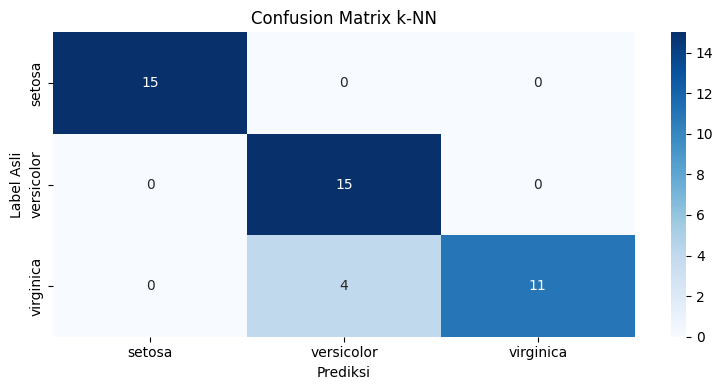

In [14]:
plt.figure(figsize=(8,4))
sns.heatmap(cm, annot=True, fmt='d' ,cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Prediksi')
plt.ylabel('Label Asli')
plt.title("Confusion Matrix k-NN")
plt.tight_layout()
plt.show()

# Classification Report atau F1-Score

In [15]:
from sklearn.metrics import classification_report

In [16]:
df_report_knn = pd.DataFrame(classification_report(Y_test, y_pred_knn, output_dict=True)).transpose()
#terserah mau di transpose apa nda
df_report_knn

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,15.000000
1,0.789474,1.000000,0.882353,15.000000
2,1.000000,0.733333,0.846154,15.000000
accuracy,0.911111,0.911111,0.911111,0.911111
macro avg,0.929825,0.911111,0.909502,45.000000
weighted avg,0.929825,0.911111,0.909502,45.000000


In [ ]:
#ALLERT ini supportnya gweh ilangin karena rentang nya ga 0-1
df_report_knn.drop(columns=['support']).style.background_gradient(cmap='Greens', vmin=0, vmax=1).format(precision=2) #colormap untuk warna gradasi yang dipakai hampir


,precision,recall,f1-score
0,1.00,1.00,1.00
1,0.79,1.00,0.88
2,1.00,0.73,0.85
accuracy,0.91,0.91,0.91
macro avg,0.93,0.91,0.91
weighted avg,0.93,0.91,0.91
